In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.cluster import KMeans
import glob
from utils import mask_by_dilated_range_and_plot

In [2]:
def draw_samples_from_face(mu=15):
    x_s=[]
    y_s=[]
    b=mu
    a=2*b
    for i in range(12000):
        y=np.random.randint(-a,a)
        x=np.random.randint(-b,b)
        if np.divide(np.square(x),np.square(b))+np.divide(np.square(y),np.square(a))<1:
                y_s.append(y)
                x_s.append(x)
                if len(y_s)==25:
                    break
    return  list(map(lambda x: x + 256, x_s)),list(map(lambda x: x +384, y_s))

def get_max_crowded_centroid_value(img):
    reshaped_img =img.reshape(img.shape[0] * img.shape[1],img.shape[2])
    kmeans=KMeans(n_clusters=4)
    quantized_img_predicted=kmeans.fit_predict(reshaped_img)

    quantized_img = [ kmeans.cluster_centers_[cl] for cl in quantized_img_predicted ]
    quantized_img=np.array(quantized_img).reshape(img.shape[0] , img.shape[1],img.shape[2])
    x,y=draw_samples_from_face(80)
    values,counts=np.unique(quantized_img[y,x],return_counts=True,axis=0)
    return values[np.argmax(counts)]

In [3]:
img=bgr_img
reshaped_img =img.reshape(img.shape[0] * img.shape[1],img.shape[2])
kmeans=KMeans(n_clusters=4)
quantized_img_predicted=kmeans.fit_predict(reshaped_img)

quantized_img = [ kmeans.cluster_centers_[cl] for cl in quantized_img_predicted ]
quantized_img=np.array(quantized_img).reshape(img.shape[0] , img.shape[1],img.shape[2]).astype(np.uint8)
x,y=draw_samples_from_face(80)
plt.figure(figsize=(20,9))
rgb_img=cv2.cvtColor(quantized_img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')
plt.scatter(x,y)
plt.show()

NameError: name 'bgr_img' is not defined

Max bgr skin range [ 86 120 151]
Min bgr skin range [42 57 65]
Max hsv skin range [ 20 151 160]
Min hsv skin range [ 8 80 89]


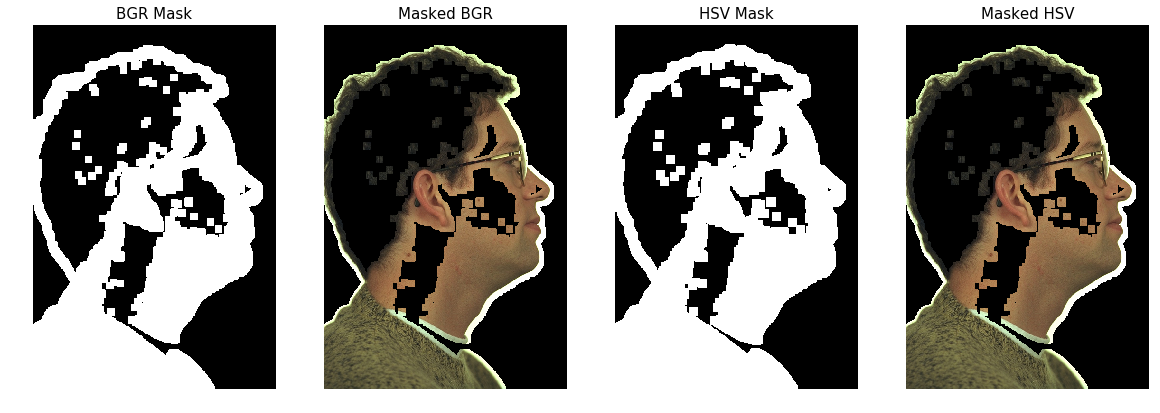

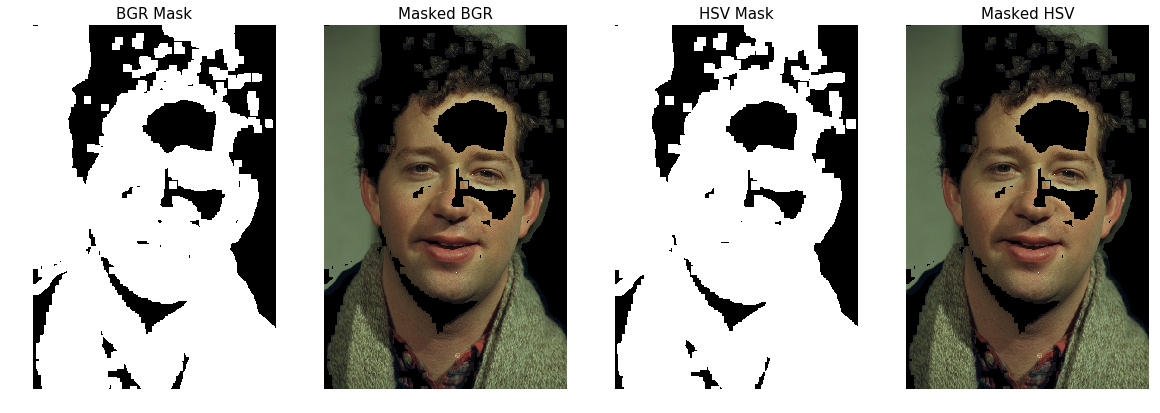

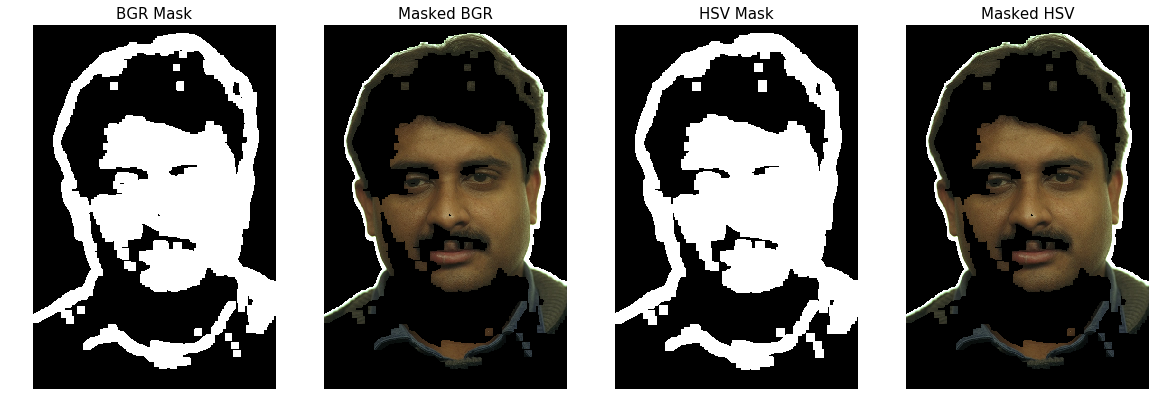

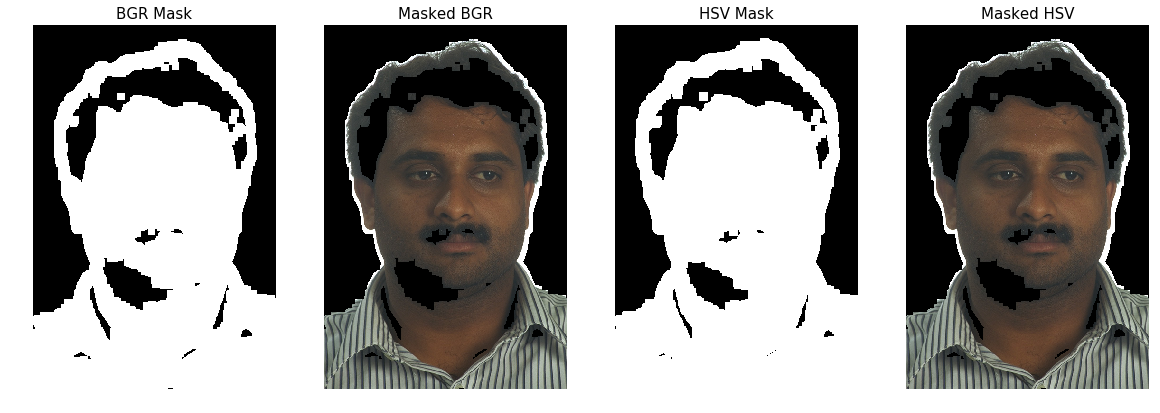

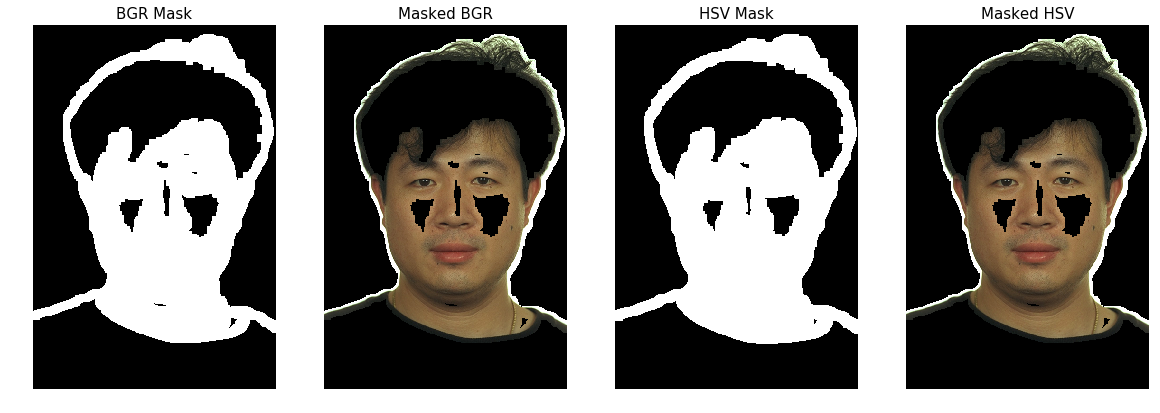

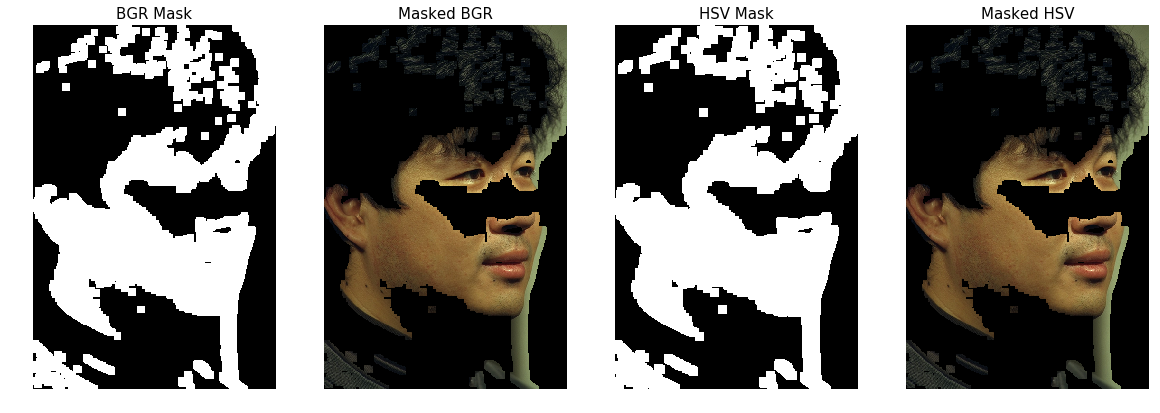

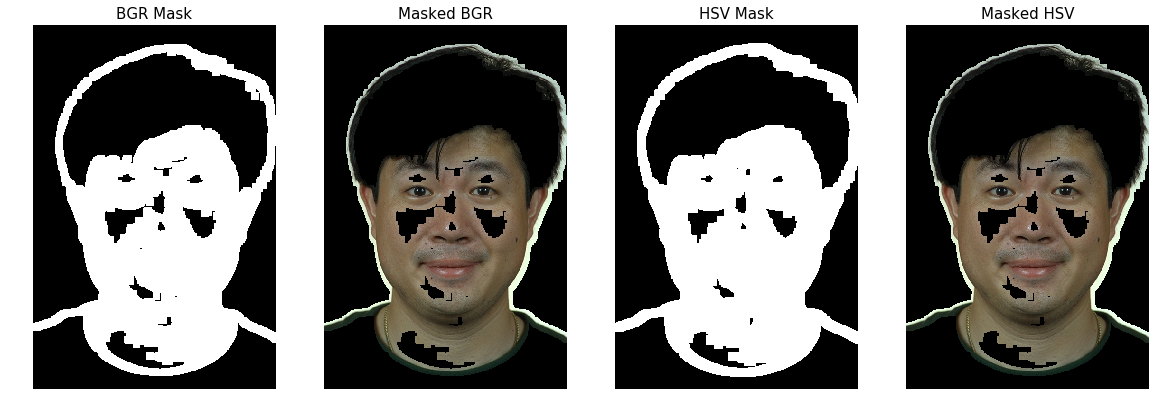

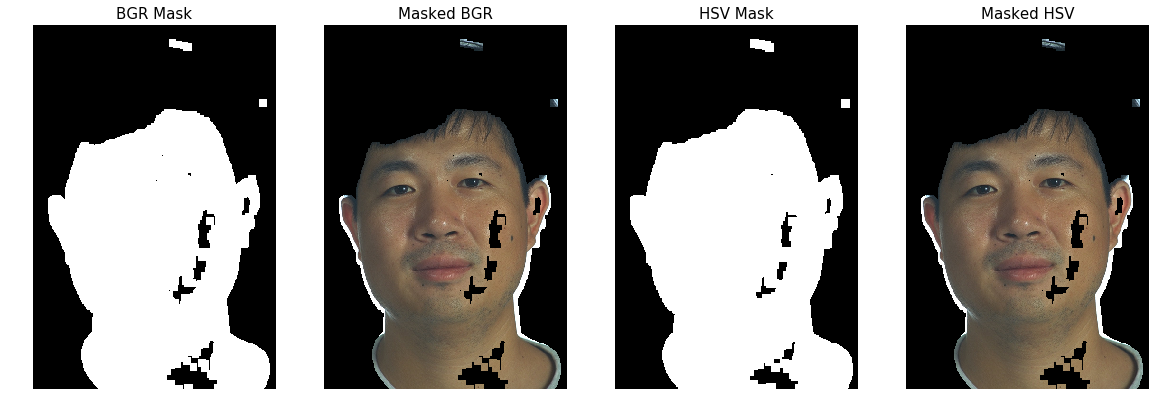

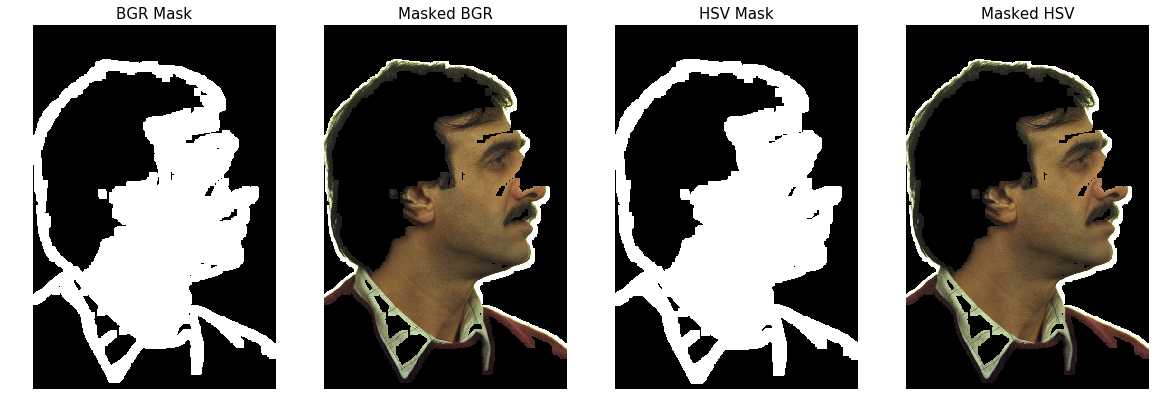

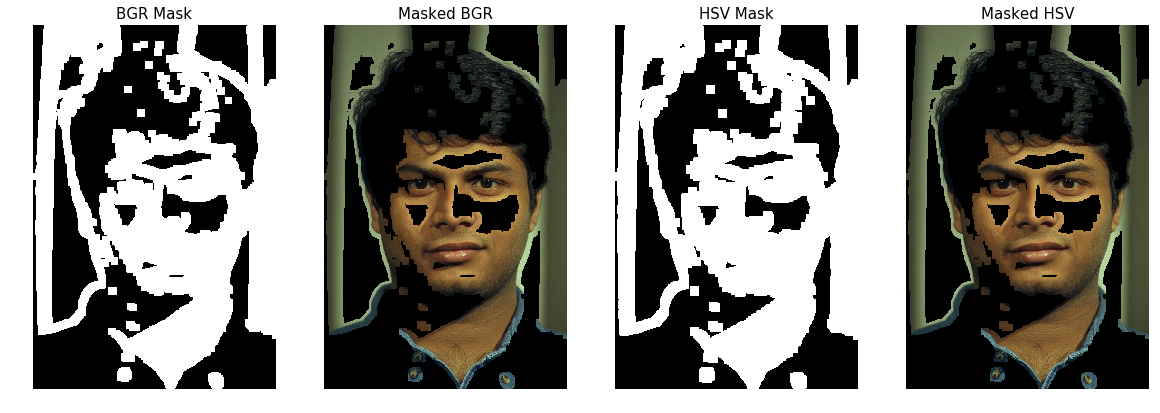

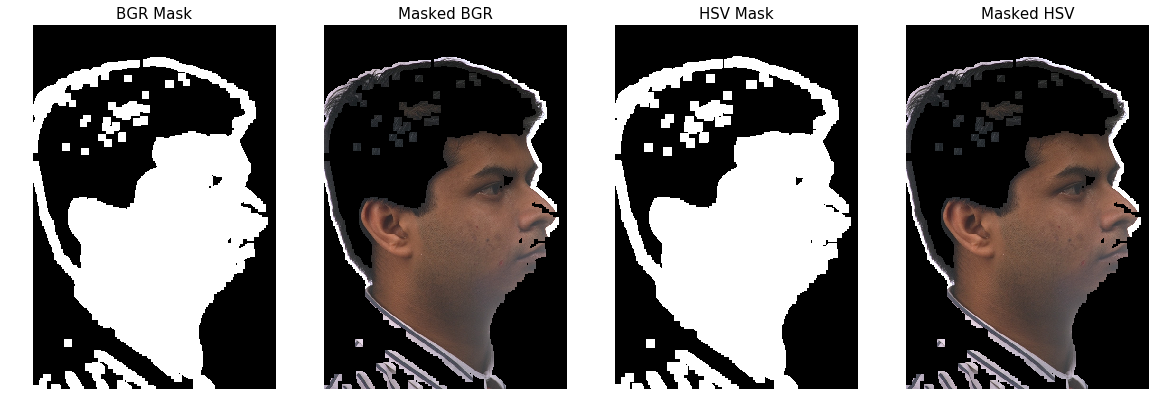

In [5]:
bgr_centroids=[]
hsv_centroids=[]
original_images=glob.glob("Images/Original Images/img_01*.jpg")+glob.glob("Images/Original Images/img_020.jpg")
original_images.sort()
for img_path in original_images:
    bgr_img=cv2.imread(img_path)
    
    
    bgr_centroids.append(get_max_crowded_centroid_value(bgr_img))
    hsv_img=cv2.cvtColor(bgr_img,cv2.COLOR_BGR2HSV)
    hsv_centroids.append(get_max_crowded_centroid_value(hsv_img))
    
    
max_bgr_skin_range=np.max(bgr_centroids,axis=0).astype(np.uint8)
min_bgr_skin_range=np.min(bgr_centroids,axis=0).astype(np.uint8)
max_hsv_skin_range=np.max(hsv_centroids,axis=0).astype(np.uint8)
min_hsv_skin_range=np.min(hsv_centroids,axis=0).astype(np.uint8)

mask_by_dilated_range_and_plot(max_bgr_skin_range,min_bgr_skin_range,max_hsv_skin_range,min_hsv_skin_range)
